In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import CubicSpline
from scipy.integrate import quad
from scipy.optimize import newton #Punto 4: Encontrar los ceros de u(t), la distancia entre t = 0 y la primera raiz hay 1/4 del periodo

# Laboratorio 07: Ecuaciones Diferenciales.

---
### Profesores: Juan Marcos Marín Ramírez, Daniel Ruiz Mejía
### Nombre: Dana Romero Bustos
*Métodos computacionales 2025-I*

---

# 1.

En una cadena de desintegración radiactiva, el elemento $A$ se desintegra en el elemento $B$, que a su vez se desintegra en $C$, y así sucesivamente hasta que la cadena de desintegración alcanza un elemento estable. Un ejemplo de tal cadena es $^{90}Sr$, que se desintegra en $^{90}Y$, que a su vez se desintegra a a $^{90}Zr$. La vida media de $^{90}Sr$ es de 28.78 años, y la vida media de $^{90}Y$ es de 2.67 días. $^{90}Zr$ es estable. Esta cadena de desintegración puede describirse mediante las siguientes ecuaciones diferenciales:

$$
\frac{dN_{Sr}}{dt} = -\lambda_{Sr}N_{Sr}
$$

$$
\frac{dN_{Y}}{dt} = -\lambda_{Y}N_{Y} - \frac{dN_{Sr}}{dt}
$$

Grafique la actividad relativa de una muestra de $^{90}Sr$ y otra gráfica de $^{90}Y$ en función del tiempo utlizando el método de Euler. (Una escala de tiempo logarítmica será útil).

**Nota:** Recuerde que $\lambda=\frac{\ln{2}}{t_{1/2}}$ con $t_{1/2}$ el tiempo de vida media.

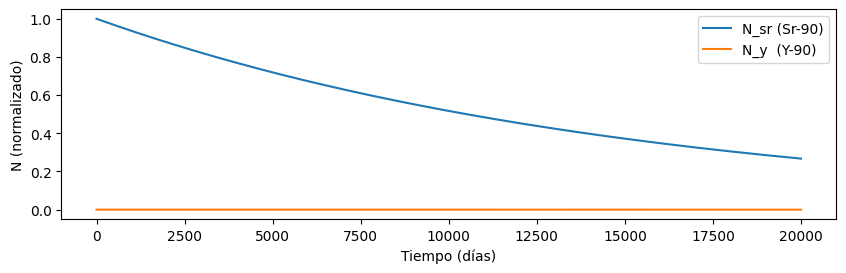

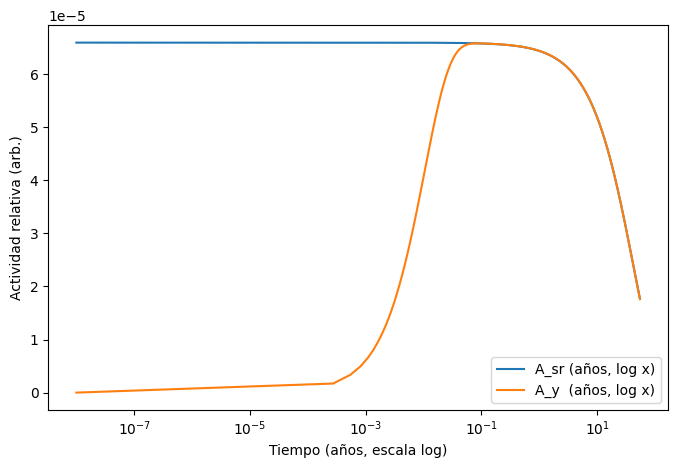

In [40]:
# Datos
t_Sr_años = 28.78   # años
t_Y_dias = 2.67     # días

# Convertir años a días
t_Sr_dias = t_Sr_años * 365.25

# Calcular lambda para Sr e Y
lambda_Sr = np.log(2) / t_Sr_dias
lambda_Y = np.log(2) / t_Y_dias

# Definir los dos sistemas EDO
f = lambda t, Nsr: -lambda_Sr * Nsr  # dNsr/dt
g = lambda t, Nsr, Ny: -lambda_Y * Ny - f(t, Nsr)  # dNy/dt

# Condiciones iniciales
N0 = 1.0
Nsr0 = N0
Ny0 = 0.0

# Intervalo de tiempo (en días)
t_end = 20000.0
h = 0.1
n_steps = int(t_end / h)

# Arrays para almacenar t y N(t)
t = np.zeros(n_steps + 1)
N_sr = np.zeros(n_steps + 1)
N_y = np.zeros(n_steps + 1)

# Condiciones iniciales
t[0] = 0
N_sr[0] = Nsr0
N_y[0] = Ny0

# Método de Euler
for n in range(n_steps):
    t[n + 1] = t[n] + h
    N_sr[n + 1] = N_sr[n] + h * f(t[n], N_sr[n])
    N_y[n + 1] = N_y[n] + h * g(t[n], N_sr[n], N_y[n])

# Actividad relativa
A_sr = lambda_Sr * N_sr   # actividad relativa de Sr (unidades: 1/día si N no está normalizado)
A_y  = lambda_Y  * N_y    # actividad relativa de Y

t_years = t / 365.25

# Grafico 1: N(t) y A(t) en días
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(t, N_sr, label='N_sr (Sr-90)')
plt.plot(t, N_y,  label='N_y  (Y-90)')
plt.xlabel('Tiempo (días)')
plt.ylabel('N (normalizado)')
plt.legend()

# Grafico 2: Actividad relativa
plt.figure(figsize=(8,5))
plt.semilogx(t_years + 1e-8, A_sr, label='A_sr (años, log x)')
plt.semilogx(t_years + 1e-8, A_y,  label='A_y  (años, log x)')
plt.xlabel('Tiempo (años, escala log)')
plt.ylabel('Actividad relativa (arb.)')
plt.legend()
plt.show()

# 2.

Este circuito actúa como un filtro pasabajas: envías una señal por la izquierda y sale alterada por la derecha.

<center>

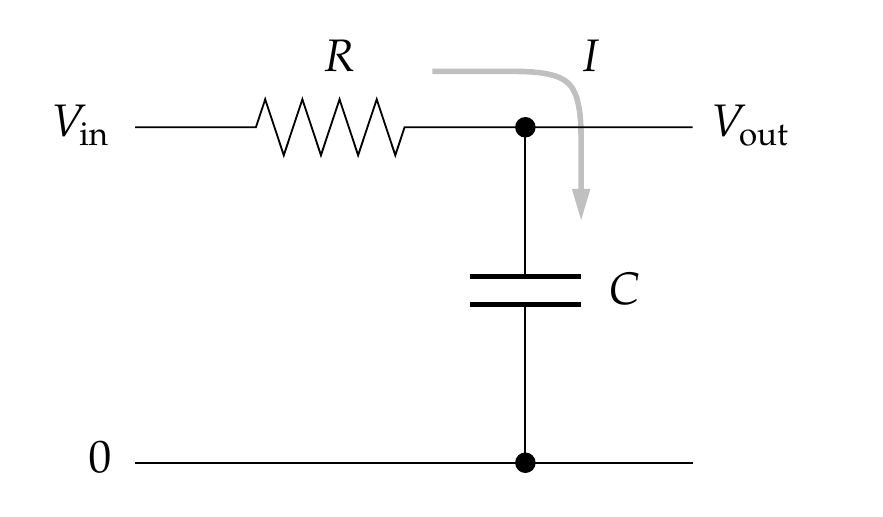

</center>

Usando la ley de Ohm y la ley del capacitor, y asumiendo que la impedancia de la carga de salida es muy alta, de modo que fluye una cantidad despreciable de corriente a través de ella, podemos escribir las ecuaciones que gobiernan este circuito de la siguiente manera. Sea $I$ la corriente que fluye a través de $R$ y hacia el capacitor, y sea $Q$ la carga en el capacitor. Entonces:

$$IR = V_{in} - V_{out}, \quad Q = CV_{out}, \quad I = \frac{dQ}{dt} $$

Sustituyendo la segunda ecuación en la tercera, y luego sustituyendo el resultado en la primera ecuación, encontramos que $ V_{\text{in}} - V_{\text{out}} = RC \left( \frac{dV_{\text{out}}}{dt} \right)$ , o equivalentemente

$$\frac{dV_{\text{out}}}{dt} = \frac{1}{RC} \left( V_{\text{in}} - V_{\text{out}} \right).$$

Escriba un programa para resolver esta ecuación para $V_{\text{out}}(t) $ usando el método de Runge-Kutta de cuarto orden cuando la señal de entrada es una onda cuadrada con frecuencia 1 y amplitud 1:

$$V_{\text{in}}(t) =
\begin{cases}
1 & \text{si } \lfloor 2t \rfloor \text{ es par}, \\
-1 & \text{si } \lfloor 2t \rfloor \text{ es impar},
\end{cases}$$

donde $\lfloor x \rfloor$ significa $x$ redondeado hacia abajo al siguiente entero más bajo. Grafique la salida del circuito filtro desde $t=0$ hasta $t=10$ cuando $RC=0.01, 0.1$ y $1$, con la condición inicial $V_{\text{out}}(0) = 0 $.

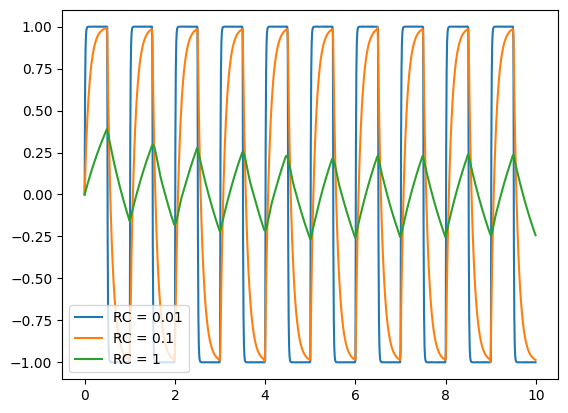

In [41]:
# Funciones
def V_in(t):
    if np.floor(2*t)%2 == 0:
        return 1
    else:
        return -1

f = lambda t, v: 1/RC * (V_in(t) - v) # Funcion que define la EDO

# Intervalo y conduciones iniciales
t_span = (0 , 10)
v0 = [0]

h = 0.01
t_eval = np.arange(0, 10, h)

for RC in [0.01, 0.1, 1]:
  sol = solve_ivp(f, t_span, v0, method='RK45', t_eval = t_eval)
  t = sol.t
  v = sol.y[0]
  plt.plot(t, v, label= f'RC = {RC}')

plt.legend()
plt.show()

# 3.

La ecuación logística es un modelo de ecuación diferencial simple que se puede utilizar para relacionar el cambio en la población $\frac{dP}{dt}$ con la población actual, $P$, dada una tasa de crecimiento, $r$, y una capacidad de carga, $K$. La ecuación logística se puede expresar como

$$
\frac{dP}{dt} = rP \left( 1 - \frac{P}{K} \right).
$$

Escriba una función `my_logistic_eq(t, P, r, K)` que represente la ecuación logística con un retorno de `dP`. Tenga en cuenta que este formato permite que `my_logistic_eq` se utilice como un argumento de entrada para `solve_ivp`. Suponga que los argumentos `dP`, `t`, `P`, `r` y `K` son todos escalares, y `dP` es el valor $\frac{dP}{dt}$ dado $r$, $P$ y $K$.
Tenga en cuenta que la ecuación logística tiene una solución analítica definida por

$$
P(t) = \frac{K P_0 e^{rt}}{K + P_0 (e^{rt} - 1)}
$$
donde $P_0$ es la población inicial.

- Grafique $P$ vs $t$ utilizando el método de Euler y de RK4, comparando con la solución analítica.
- Calcule el error relativo de ambas soluciones, considerando la solución analítica como referencia

In [42]:
def Euler(f, x0, y0, h, x_end):
  '''
  Método de Euler para resolver una Ecuación Diferencial Ordinaria (EDO) de primer orden.
  Entradas:
    f: La función que define la EDO. Debe aceptar dos argumentos: x e y -> Callable
    x0: La condición inicial para la variable independiente (x) -> float
    y0: La condición inicial para la variable dependiente (y) en x0 -> float
    h: El tamaño del paso (incremento en x) -> float
    x_end: El valor final de x hasta donde se desea aproximar la solución -> float

  Salidas:
    Una tupla (x, y) donde:
    x: Un arreglo numpy con los valores de x en cada paso -> Array
    y: Un arreglo numpy con las aproximaciones de y correspondientes a cada valor de x -> Array
    '''
  # Número de pasos necesarios
  n_steps = int((x_end - x0) / h)

  # Arreglos numpy para almacenar los valores de x e y
  x = np.zeros(n_steps + 1)
  y = np.zeros((n_steps + 1 , len(y0)))

  # Almacenar las condiciones iniciales
  x[0] = x0
  y[0] = y0

  for i in range(n_steps):
    x[i+1] = x[i] + h
    # Aplicar el método de Euler
    y[i+1] = y[i] + h * f(x[i], y[i])

  return x, y

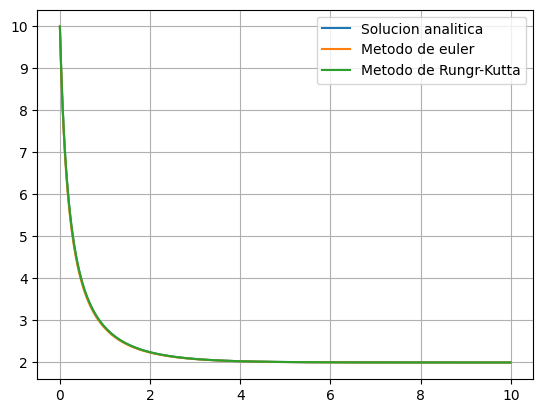

In [43]:
def my_logistic_eq(t, P, r = 1, K = 2):
  return r * P * (1 - P/K)

# Solución analitica
def P(t, P0, r = 1, K = 2):
  return (K * P0 * np.exp(r * t))/(K + P0*(np.exp(r * t) - 1))

# Intervalo y condiciones iniciales
t_span = (0 , 10)
P0 = 10
h = 0.01

t_eval = np.arange(0, 10, h)

t , sol_Euler = Euler(my_logistic_eq, 0, [P0], h, 10)
sol_RK4 = solve_ivp(my_logistic_eq , t_span , [P0] , method='RK45' , t_eval= t_eval)
sol_analitica = P(t_eval, P0)

plt.plot(t_eval, sol_analitica, label= 'Solucion analitica')
plt.plot(t, sol_Euler, label= 'Metodo de euler')
plt.plot(sol_RK4.t, sol_RK4.y[0], label= 'Metodo de Rungr-Kutta')

plt.grid(True)
plt.legend()
plt.show()

# 4.
Considera la ecuación de movimiento para el desplazamiento angular $u$ de un péndulo rígido no lineal de longitud $l$ (donde $g$ es la aceleración gravitacional):

$$
\ddot{u}= -\frac{g}{l} \sin u,
$$

con las condiciones iniciales:

$$
u(0) = u_0, \quad \dot{u}(0) = 0.
$$

El período de oscilaciones de amplitud arbitraria depende explícitamente del desplazamiento inicial $u_0 \in [-\pi, \pi]$:

$$
T = T_0 \frac{2}{\pi} K \left( \alpha \right).
$$

con
$$
T_0=\sqrt{\frac{l}{g}}
$$

$$
\alpha=\sin^2 \frac{u_0}{2}
$$

$$
K(\alpha)=\int_0^1 \frac{dz}{\sqrt{(1-z^2)(1-\alpha z^2)}}.
$$

- Halle la solución $u(t)$ utilizando el método de Runge Kutta con $h=0.001$ y distintos valores de $u_0=1$ y $u_0=\pi/2$.
- Grafique $T/T_0$ en función de $u_0$ y compare con el resultado analítico.

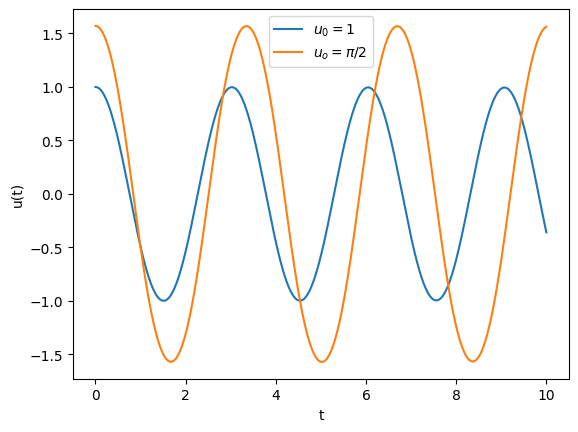

In [44]:
def F(t , Y):
  '''
  Se planteo el siguiente sistema de primer orden:
  u' = v
  v' = -(g/l)sin(u)
  => (u(0) , v(0)) = (u0 , 0)

  Entrada:
  - Y : (u , u') = (u , v) -> array
  - t : Variable independiente

  Salida:
  - dY_dt : (du_dt , dv_dt) -> array
  '''


  dY_dt = np.zeros_like(Y, dtype= float)

  dY_dt[0] = Y[1]
  dY_dt[1] = -g/l * np.sin(Y[0])

  return dY_dt

# Datos
g = 9.8 # m/s^2
l = 2. # m

# Condiciones Iniciales y tiempo
Y0_1 = np.array([1 , 0])
Y0_2 = np.array([np.pi/2 , 0])

h = 0.001
t0 , tf = 0 , 10
t = np.arange(t0 , tf + h , h)

# Solución con RK4, para (u0 = 1 , 0)
sol_u1_RK4 = solve_ivp(F , (t0 , tf) , Y0_1 , method='RK45' , t_eval= t)
u1 = sol_u1_RK4.y[0]

# Solución con RK4, para (u0 = pi/2 , 0)
sol_u2_RK4 = solve_ivp(F , (t0 , tf) , Y0_2 , method='RK45' , t_eval= t)
u2 = sol_u2_RK4.y[0]

plt.plot(t, u1, label= '$u_0 = 1$')
plt.plot(t, u2, label= '$u_o = \\pi/2$')

plt.xlabel('t')
plt.ylabel('u(t)')
plt.legend()
plt.show()

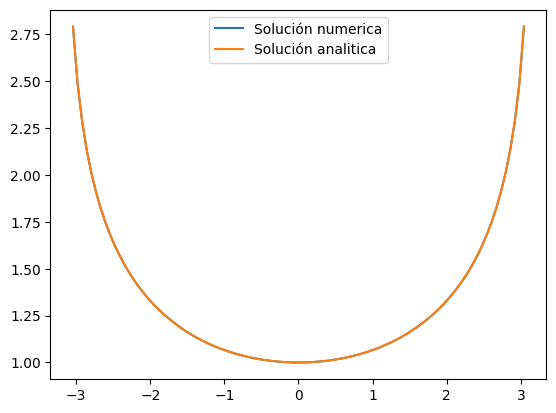

In [45]:
# T/T0 numerico
u0 = np.linspace(-np.pi + 0.1, np.pi - 0.1, 100)
T0 = np.sqrt(l/g) * 2 * np.pi

def T(u0):
  t0 , tf = 0 , 10
  h = 0.001
  t = np.arange(t0 , tf + h , h)

  Y0 = np.array([u0, 0])

  sol_u = solve_ivp(F , (t0 , tf) , Y0 , t_eval= t)

  ut_Spline = CubicSpline(sol_u.t, sol_u.y[0], bc_type= 'natural')

  u = 4*newton(ut_Spline, 1)

  return u


Ti = np.zeros_like(u0)
for u in range(len(u0)):

  Ti[u] = T(u0[u])

razon = Ti/T0

# T/T0 analitico

f_int = lambda z, a: 1/np.sqrt((1-z**2)*(1-a*z**2)) # Función a integrar para encontrar K
K = lambda a: quad(f_int, 0, 1, args= (a))[0]

a = np.sin(u0/2)**2

razon_analitica = np.zeros_like(a)

for i in range(len(a)):
  razon_analitica[i] = 2/np.pi * K(a[i])

plt.plot(u0, razon, label= 'Solución numerica')
plt.plot(u0, razon_analitica, label= 'Solución analitica')

plt.legend()
plt.show()

# 5.

Considere un sistema ecológico aislado donde habitan dos especies: conejos ($x$) y zorros ($y$). La dinámica poblacional de ambas especies se describe mediante el siguiente sistema de ecuaciones diferenciales:

$$\frac{dx}{dt} = \alpha x - \beta xy$$
$$\frac{dy}{dt} = -\gamma y + \delta xy$$

Donde:
- $x(t)$ representa la población de conejos en el tiempo t
- $y(t)$ representa la población de zorros en el tiempo t
- $\alpha$ = 0.8 (tasa de reproducción de los conejos)
- $\beta$ = 0.04 (tasa de depredación de conejos por zorros)
- $\gamma$ = 0.3 (tasa de mortalidad natural de los zorros)
- $\delta$ = 0.01 (eficiencia de conversión de presas consumidas en nuevos depredadores)

Condiciones iniciales:
- $x(0)$ = 50 (población inicial de conejos)
- $y(0)$ = 20 (población inicial de zorros)


**a)** Implemente el método de Euler para resolver este sistema con un paso temporal de $h$ = 0.1, simulando la evolución del sistema durante 50 unidades de tiempo.

**b)** Implemente el método de Runge-Kutta de segundo y cuarto orden para resolver el mismo sistema con idénticos parámetros.

**c)** Compare los resultados de Euler y RK4 mediante:
   - Gráficas de la evolución temporal de ambas poblaciones
   - Diagrama de fase ($x$ vs $y$)
   - Cálculo del error relativo entre ambas soluciones, considerando RK4 como referencia

**d)** Analice la estabilidad de ambos métodos cambiando el tamaño del paso temporal ($h$ = 0.5, $h$ = 0.05). ¿Qué observa? Explique por qué ocurre.

**e)** Investigue cómo las variaciones en los parámetros $\alpha$, $\beta$, $\gamma$ y $\delta$ afectan la dinámica del sistema. Elija un parámetro y realice simulaciones con al menos tres valores distintos.

In [48]:
# Datos
alpha = 0.8 # Tasa de reproducción de los conejos
beta = 0.04 # Tasa de depredación de conejos por zorros
gamma = 0.3 # Tasa de mortalidad natural de los zorros
delta = 0.01 # Eficiencia de converción de presas consumidas en nuevos depredadores

def Poblacion(t , P):
  '''
  Función que define el sistema de ecuaciones que representa la dinamica poblacional
  Entradas:
    t : valor del tiempo en el que se quiere evaluar
    P : Tupla (x , y) => Población
  '''

  x , y = P # x = conejos , y = zorros
  dx_dt = (alpha * x) - (beta * x * y)
  dy_dt = (-gamma * y) + (delta * x * y)

  return np.array([dx_dt, dy_dt])

# Condiciones iniciales
t0 = 0.0
tf = 50.0
P0 = np.array([50.0 , 20.0])
h = 0.1

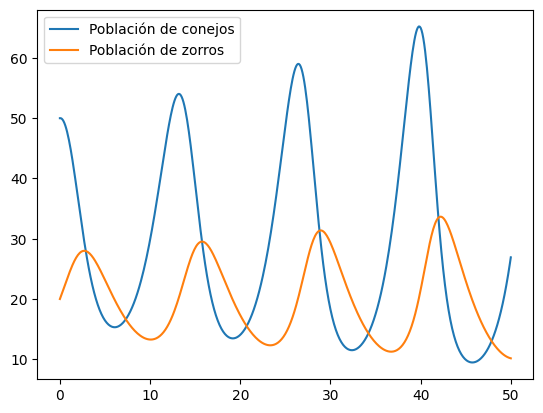

In [49]:
# Inciso a)

t_euler , poblacion_euler = Euler(Poblacion , t0 , P0 , h , tf)
plt.plot(t_euler, poblacion_euler, label= ['Población de conejos', 'Población de zorros'])
plt.legend()
plt.show()

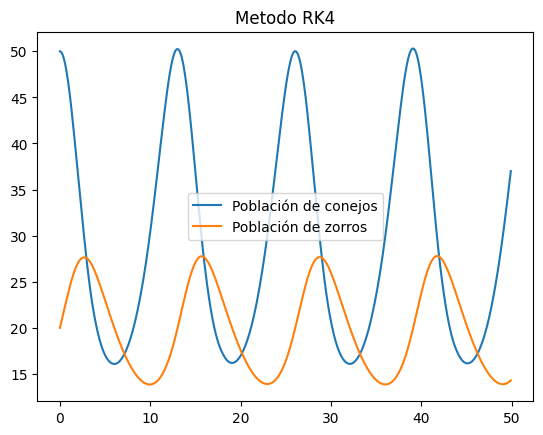

In [50]:
# Inciso b)

sol_RK4 = solve_ivp(Poblacion , (t0 , tf) , P0 , method='RK45' , t_eval= np.arange(t0 , tf , h))
sol_RK2 = solve_ivp(Poblacion , (t0 , tf) , P0 , method='RK23' , t_eval= np.arange(t0 , tf , h))
t_RK4 = sol_RK4.t
x_RK4 = sol_RK4.y[0] # Conejos
y_RK4 = sol_RK4.y[1] # Zorros

plt.plot(t_RK4, x_RK4, label= 'Población de conejos')
plt.plot(t_RK4, y_RK4, label= 'Población de zorros')
plt.title('Metodo RK4')
plt.legend()
plt.show()

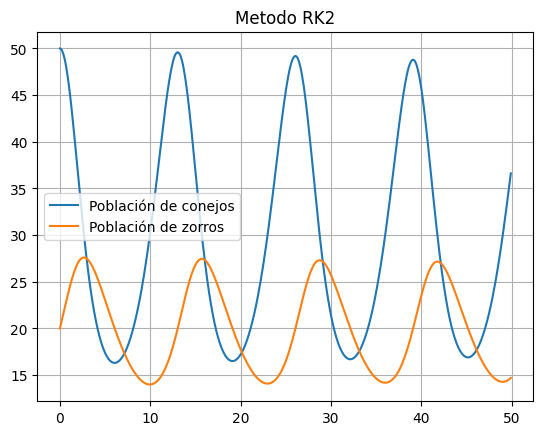

In [ ]:
t_RK2 = sol_RK2.t
x_RK2 = sol_RK2.y[0] # Conejos
y_RK2 = sol_RK2.y[1] # Zorros

plt.plot(t_RK2, x_RK2, label= 'Población de conejos')
plt.plot(t_RK2, y_RK2, label= 'Población de zorros')
plt.title('Metodo RK2')
plt.grid(True)
plt.legend()
plt.show()

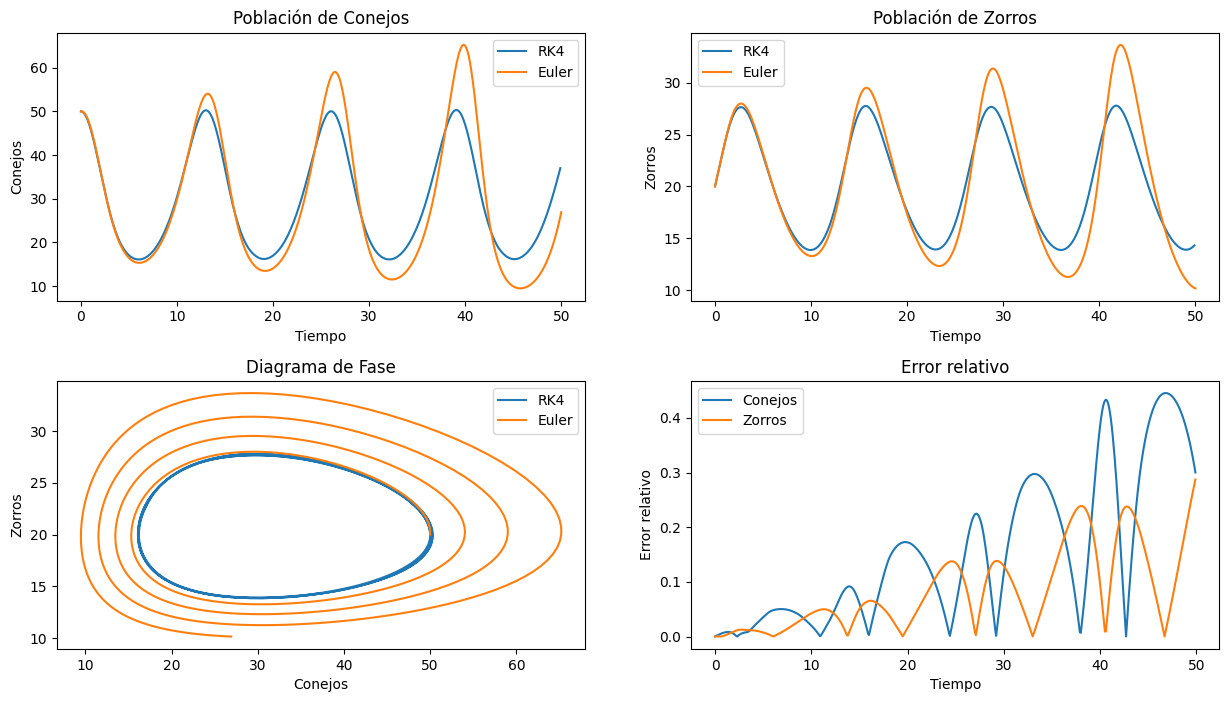

In [ ]:
# Inciso c)
# Calculo de error relativo
n = min(len(poblacion_euler[:, 0]), len(x_RK4))
error_conejos = np.abs((poblacion_euler[:n, 0] - x_RK4[:n]) / x_RK4[:n])
error_zorros  = np.abs((poblacion_euler[:n, 1] - y_RK4[:n]) / y_RK4[:n])

fig, ax = plt.subplots(2, 2, figsize=(15, 8))
plt.subplots_adjust(hspace=0.3, wspace=0.2)

# Población de conejos
ax[0, 0].set_title('Población de Conejos')

ax[0, 0].plot(t_RK4, x_RK4, label='RK4')
ax[0, 0].plot(t_euler, poblacion_euler[:, 0], label='Euler')

ax[0, 0].set_xlabel('Tiempo')
ax[0, 0].set_ylabel('Conejos')

ax[0, 0].legend()

# Población de zorros
ax[0, 1].set_title('Población de Zorros')

ax[0, 1].plot(t_RK4, y_RK4, label='RK4')
ax[0, 1].plot(t_euler, poblacion_euler[:, 1], label='Euler')

ax[0, 1].set_xlabel('Tiempo')
ax[0, 1].set_ylabel('Zorros')

ax[0, 1].legend()

# Diagrama de fase
ax[1, 0].set_title('Diagrama de Fase')

ax[1, 0].plot(x_RK4, y_RK4, label='RK4')
ax[1, 0].plot(poblacion_euler[:, 0], poblacion_euler[:, 1], label='Euler')

ax[1, 0].set_xlabel('Conejos')
ax[1, 0].set_ylabel('Zorros')

ax[1, 0].legend()

# Error relativo
ax[1, 1].set_title('Error relativo')

ax[1, 1].plot(t_RK4, error_conejos, label='Conejos')
ax[1, 1].plot(t_RK4, error_zorros, label='Zorros')

ax[1, 1].set_xlabel('Tiempo')
ax[1, 1].set_ylabel('Error relativo')

ax[1, 1].legend()

plt.show()

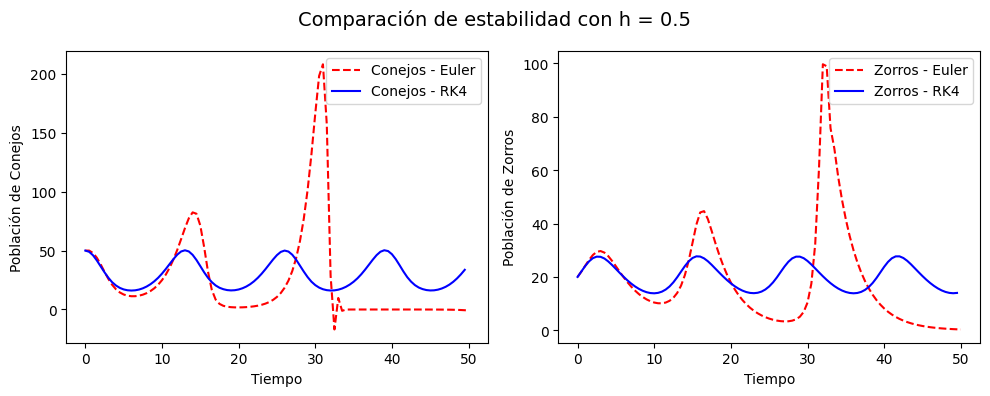

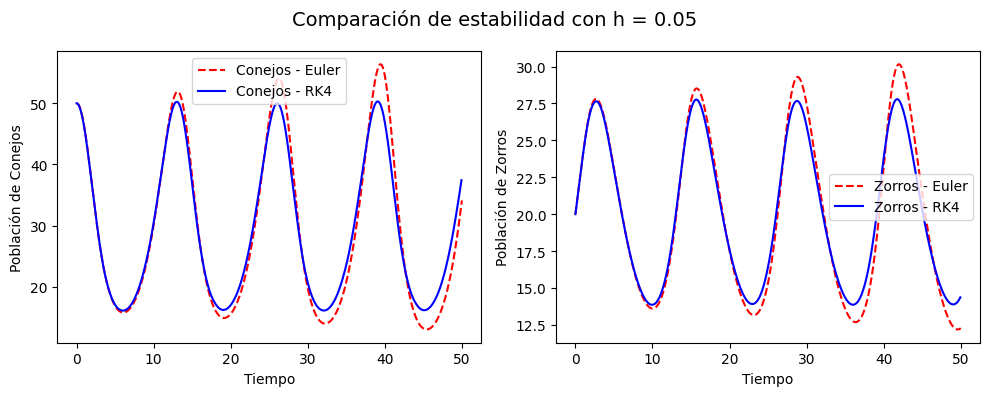

Se puede observar que para h = 0.5, el metodo de Euler realiza saltos muy bruscos, en comparacion a RK4.
En cambio, para h= 0.05, Euler se vuelve un poco mas estable.
Esto se debe a que, Euler es un método de orden 1 (con error global O(h)) y además condicionalmente estable para sistemas oscilatorios:
Tiende a introducir crecimiento (o amortiguamiento) numérico si h no es lo bastante pequeño.
En cambio, RK4 es de orden 4 (con error global O(h^4)) y aproxima mucho mejor la evolución.


In [ ]:
# Inciso d)

pasos = [0.5, 0.05]

for h in pasos:
  # Euler
  t_e, p_e = Euler(Poblacion , t0 , P0 , h , tf)
  # RK4
  sol_4 = solve_ivp(Poblacion , (t0 , tf) , P0 , method='RK45' , t_eval= np.arange(t0 , tf , h))
  t_r = sol_4.t
  x_r = sol_4.y[0]
  y_r = sol_4.y[1]

  # Graficas
  plt.figure(figsize=(10,4))
  plt.suptitle(f"Comparación de estabilidad con h = {h}", fontsize=14)

  # Conejos
  plt.subplot(1,2,1)
  plt.plot(t_e, p_e[:, 0], 'r--', label="Conejos - Euler")
  plt.plot(t_r, x_r, 'b', label="Conejos - RK4")
  plt.xlabel("Tiempo")
  plt.ylabel("Población de Conejos")
  plt.legend()

  # Zorros
  plt.subplot(1,2,2)
  plt.plot(t_e, p_e[:, 1], 'r--', label="Zorros - Euler")
  plt.plot(t_r, y_r, 'b', label="Zorros - RK4")
  plt.xlabel("Tiempo")
  plt.ylabel("Población de Zorros")
  plt.legend()

  plt.tight_layout()
  plt.show()

print('Se puede observar que para h = 0.5, el metodo de Euler realiza saltos muy bruscos, en comparacion a RK4.\nEn cambio, para h= 0.05, Euler se vuelve un poco mas estable.\nEsto se debe a que, Euler es un método de orden 1 (con error global O(h)) y además condicionalmente estable para sistemas oscilatorios:\nTiende a introducir crecimiento (o amortiguamiento) numérico si h no es lo bastante pequeño.\nEn cambio, RK4 es de orden 4 (con error global O(h^4)) y aproxima mucho mejor la evolución.')

<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:18: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:18: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-88583971.py:12: SyntaxWarning: invalid escape sequence '\d'
  ax[0].plot(sol_RK4.t, sol_RK4.y[0], label= f'$\delta$ = {delta}')
/tmp/ipython-input-88583971.py:18: SyntaxWarning: invalid escape sequence '\d'
  ax[1].plot(sol_RK4.t, sol_RK4.y[1], label= f'$\delta$ = {delta}')


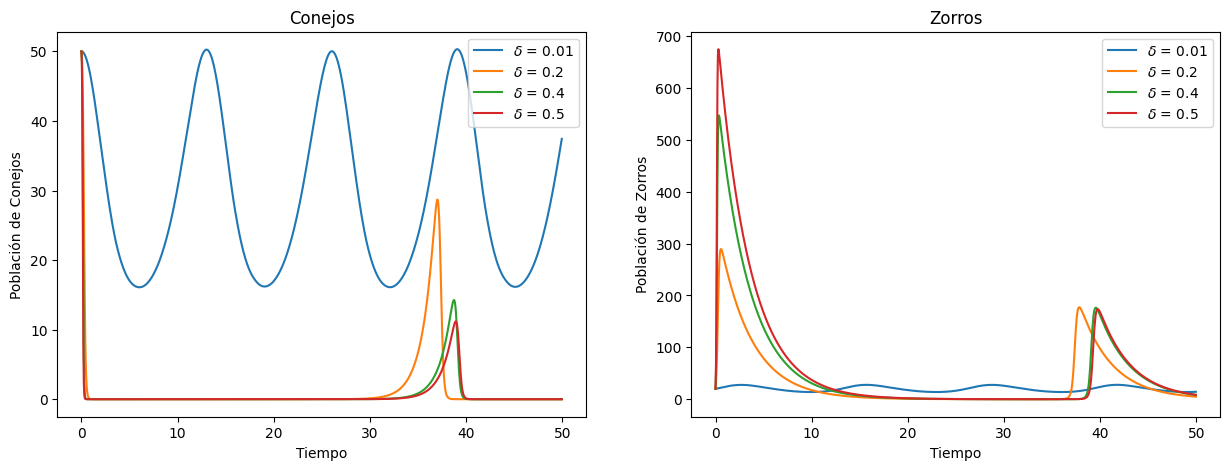

In [ ]:
# Inciso e): Se eligio el parabletro delta para bariar

delta_vals = np.array([0.01, 0.2, 0.4, 0.5])

fig, ax = plt.subplots(1, 2, figsize= (15,5))

for delta in delta_vals:

  sol_RK4 = solve_ivp(Poblacion, (t0, tf), P0, method='RK45' , t_eval= np.arange(t0, tf, h))

  ax[0].set_title('Conejos')
  ax[0].plot(sol_RK4.t, sol_RK4.y[0], label= f'$\delta$ = {delta}')
  ax[0].set_xlabel("Tiempo")
  ax[0].set_ylabel("Población de Conejos")
  ax[0].legend()

  ax[1].set_title('Zorros')
  ax[1].plot(sol_RK4.t, sol_RK4.y[1], label= f'$\delta$ = {delta}')
  ax[1].set_xlabel("Tiempo")
  ax[1].set_ylabel("Población de Zorros")
  ax[1].legend()

plt.show()


# 6.

El oscilador armónico forzado amortiguado está dado por la siguiente ecuación:

$$\frac{d^{2}x}{dt^{2}} + \gamma \frac{dx}{dt} + \omega_{0}^{2} x = \frac{F}{m},$$

donde $\gamma$ es la constante de amortiguamiento, $\omega_{0} = \sqrt{k/m}$ es la frecuencia angular natural, $m$ es la masa y $F$ es la fuerza impulsora. Esta ecuación de segundo orden también puede escribirse con dos ecuaciones de primer orden:

$$
\frac{dx}{dt} = v
$$

$$
\frac{dv}{dt} = \frac{F}{m} - \gamma v - \omega_{0}^{2} x
$$

que es la forma que usaremos para la integración numérica.

La energía del oscilador armónico es:

$$
E = \frac{1}{2} m v^{2} + \frac{1}{2} k x^{2},
$$

Considere $x(0)=0$ y $v(0)=1$. Grafique $x(t)$ y $E(t)$ para los siguientes casos:

- $F=0$ y para $\gamma=[0,0.05,0.3]$.
- $\gamma=0$, $F=F_0\cos{(\omega t)} \ e^{-t^2/T^2}$ con $F_0=1N$, $T=10s$ y $\omega=[0,0.8\omega_0,\omega_0]$.


In [ ]:
def EDO(t , Y):
  '''
  Funcion que define la EDO:
  x' = v
  v' = F/m - gamma * v - w0**2 * x

  Entradas:
  - t: variable independeinte
  - Y: (x , v) -> array

  salida:
  - dY_dt : (dx_dt , dv_dt) -> array
  '''

  x , v = Y
  dx_dt = v
  dv_dt = F/m - gamma * v - x * w0**2

  return np.array([dx_dt , dv_dt])

# Función de la Energia
E = lambda x , v : (m * v**2 + k * x**2)/2

# Datos generales para resolver los dos casos:
m = 1
k = 1
w0 = 1

Y0 = [0 , 1] # Datos iniciales
h = 0.01
t_span = (0, 20)
t = np.arange(0 , 20 , h)

<>:14: SyntaxWarning: invalid escape sequence '\g'
<>:19: SyntaxWarning: invalid escape sequence '\g'
<>:14: SyntaxWarning: invalid escape sequence '\g'
<>:19: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipython-input-1770287277.py:14: SyntaxWarning: invalid escape sequence '\g'
  ax[0].plot(sol1.t, sol1.y[0] , label= f'$\gamma$ = {gamma}')
/tmp/ipython-input-1770287277.py:19: SyntaxWarning: invalid escape sequence '\g'
  ax[1].plot(sol1.t, E(sol1.y[0] , sol1.y[1]) , label= f'$\gamma$ = {gamma}')


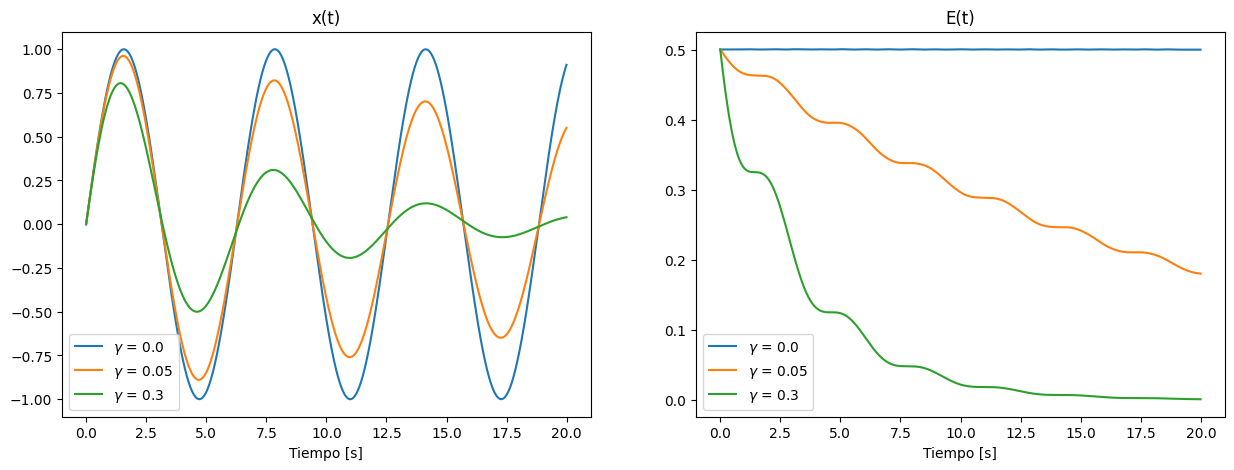

In [ ]:
# Caso 1:
# Datos especificos para el caso:
F = 0
gamma_vals = np.array([0 , 0.05 , 0.3])

fig, ax = plt.subplots(1, 2, figsize= (15,5))

for gamma in gamma_vals:
  # Solucionando el sistema para cada valor de gamma
  sol1 = solve_ivp(EDO , t_span , Y0 , method='RK45' , t_eval= t)

  # Graficar
  ax[0].set_title("x(t)")
  ax[0].plot(sol1.t, sol1.y[0] , label= f'$\gamma$ = {gamma}')
  ax[0].set_xlabel("Tiempo [s]")
  ax[0].legend()

  ax[1].set_title("E(t)")
  ax[1].plot(sol1.t, E(sol1.y[0] , sol1.y[1]) , label= f'$\gamma$ = {gamma}')
  ax[1].set_xlabel("Tiempo [s]")
  ax[1].legend()

<>:24: SyntaxWarning: invalid escape sequence '\o'
<>:25: SyntaxWarning: invalid escape sequence '\o'
<>:24: SyntaxWarning: invalid escape sequence '\o'
<>:25: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-1024910769.py:24: SyntaxWarning: invalid escape sequence '\o'
  ax[0].plot(sol2.t, sol2.y[0], label=f"$\omega$ = {w}")
/tmp/ipython-input-1024910769.py:25: SyntaxWarning: invalid escape sequence '\o'
  ax[1].plot(sol2.t, E(sol2.y[0], sol2.y[1]), label=f"$\omega$ = {w}")


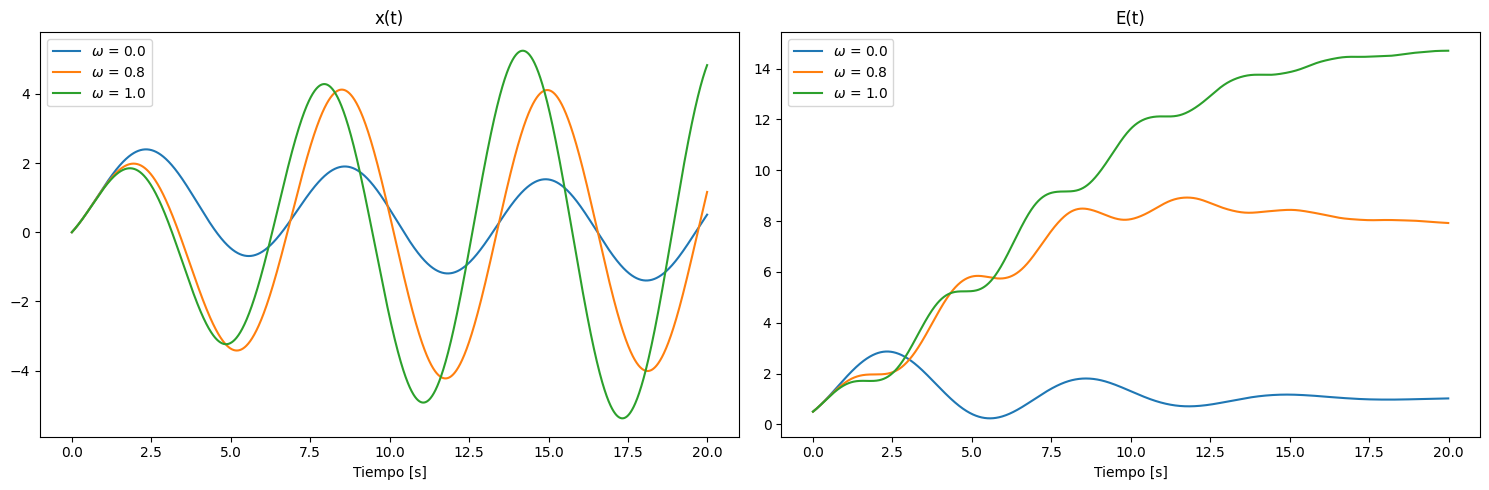

In [ ]:
# Caso 2:
# Datos especificos para el caso
gamma = 0
F0 = 1 # N
T = 10 # s
w_vals = np.array([0 , 0.8 * w0 , w0])

fig, ax = plt.subplots(1, 2, figsize= (15,5))

for w in w_vals:

  # Definimos la EDO con F(t)
  def EDO(t, Y):
    x , v = Y
    F_t = F0 * np.cos(w * t) * np.exp(-(t/T)**2)  # fuerza dependiente de t
    dx_dt = v
    dv_dt = (F_t / m) - gamma * v - w0**2 * x
    return [dx_dt, dv_dt]

  # Solucion al sistema EDO
  sol2 = solve_ivp(EDO, t_span, Y0, method='RK45', t_eval=t)

  # Graficamos
  ax[0].plot(sol2.t, sol2.y[0], label=f"$\omega$ = {w}")
  ax[1].plot(sol2.t, E(sol2.y[0], sol2.y[1]), label=f"$\omega$ = {w}")

ax[0].set_title("x(t)")
ax[0].set_xlabel("Tiempo [s]")
ax[0].legend()

ax[1].set_title("E(t)")
ax[1].set_xlabel("Tiempo [s]")
ax[1].legend()

plt.tight_layout()
plt.show()

# 7.
El **problema restringido de tres cuerpos** describe el movimiento de una partícula de masa despreciable bajo la influencia gravitacional de dos cuerpos masivos $m_1$ y $m_2$, que orbitan en trayectorias circulares alrededor de su centro de masa.

Definimos el parámetro de masa $\mu$ como:
$$
\mu \equiv \frac{m_2}{m_1 + m_2}, \quad \text{con} \quad 0 < \mu \leq \frac{1}{2}
$$

Si tomamos un **sistema de referencia rotante** con velocidad angular $\omega$, cuyo origen está en el centro de masa del sistema y que gira con la misma velocidad angular que los cuerpos principales, el **potencial efectivo** $U$ puede escribirse como:
$$
U = -\frac{\mu}{r_1} - \frac{1-\mu}{r_2} - \frac{1}{2} \omega^2 (x^2 + y^2)
$$
donde $r_1$ y $r_2$ son las distancias del cuerpo de prueba a $m_1$ y $m_2$ respectivamente:
$$
r_1 = \sqrt{(x + \mu)^2 + y^2}, \quad r_2 = \sqrt{(x - 1 + \mu)^2 + y^2}
$$

Las ecuaciones de movimiento de la partícula testigo son:
$$
\ddot{x} - 2\omega \dot{y} = \frac{\partial U}{\partial x}, \quad  
\ddot{y} + 2\omega \dot{x} = \frac{\partial U}{\partial y},
$$

En un sistema de coordenadas adimensionales donde la distancia entre los cuerpos principales es 1 y $\omega^2 = 1$, existen cinco **puntos de Lagrange** $(L_1, L_2, L_3, L_4, L_5)$ donde las fuerzas se equilibran.

Los **puntos triangulares** $L_4$ y $L_5$ forman un triángulo equilátero con los cuerpos principales. Si colocamos $m_1$ en $(-\mu,0)$ y $m_2$ en $(1-\mu,0)$ en el sistema rotante, las coordenadas de $L_4$ y $L_5$ son:  

$$
L_4 = \left( \frac{1}{2} - \mu, \frac{\sqrt{3}}{2} \right), \quad  
L_5 = \left( \frac{1}{2} - \mu, -\frac{\sqrt{3}}{2} \right).
$$

Dado que estos puntos forman un triángulo equilátero con los cuerpos masivos, se cumple que la partícula testigo está a la misma distancia de ambos cuerpos:  

$$
r_1 = r_2.
$$


Para estudiar la estabilidad de $L_4$ y $L_5$, introducimos **pequeñas perturbaciones**. Por ejemplo, alrededor de $L_4$:  

$$
x = x_{L_4} + \xi, \quad y = y_{L_4} + \eta.
$$

Sustituyendo en las ecuaciones de movimiento y expandiendo el potencial efectivo en **serie de Taylor** hasta primer orden en $\xi$ y $\eta$, obtenemos el sistema de ecuaciones linealizado:  

$$
\frac{d}{dt}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix}  
= \mathbf{A}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix},
$$

donde la matriz **$\mathbf{A}$** tiene la forma:

$$
\mathbf{A} =
\begin{bmatrix}
0 & 1 & 0 & 0 \\
a & 0 & b & 2\omega \\
0 & 0 & 0 & 1 \\
c & -2\omega & d & 0
\end{bmatrix}.
$$

Los coeficientes de la matriz $\mathbf{A}$ están dados por las **segundas derivadas parciales del potencial efectivo $U$** evaluadas en $L_4$:

$$
a = \frac{\partial^2 U}{\partial x^2} (L_4), \quad
b = \frac{\partial^2 U}{\partial x \partial y} (L_4),
$$

$$
c = \frac{\partial^2 U}{\partial y \partial x} (L_4), \quad
d = \frac{\partial^2 U}{\partial y^2} (L_4).
$$

Esto mismo se hace para $L_5$. Luego, la estabilidad de $L_4$ y $L_5$ se determina analizando los **valores propios** de la matriz $\mathbf{A}$. Para que estos puntos sean estables, las soluciones deben ser oscilatorias, es decir, los valores propios deben ser imaginarios puros y no contener componentes reales positivas.  

- Encuentre los valores propios de la matriz $\mathbf{A}$ y analice su estabilidad.
- Determine el valor crítico de $\mu_c$ que garantiza la estabilidad de $L_i$ con $i = 4, 5$ para esto varie $\mu$ y examine cuando los valores propios cambian de ser reales a ser complejos. Encuentre dicho valor y compare con el denominado **criterio de Routh**
$$
\mu < \mu_c \approx 0.03852.
$$
- Finalmente, examine la estabilidad de $L_4$ y $L_5$ para el caso del Sol y la Tierra, o el Sol y Jupiter.

<>:70: SyntaxWarning: invalid escape sequence '\m'
<>:70: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-1915252009.py:70: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$\mu$')


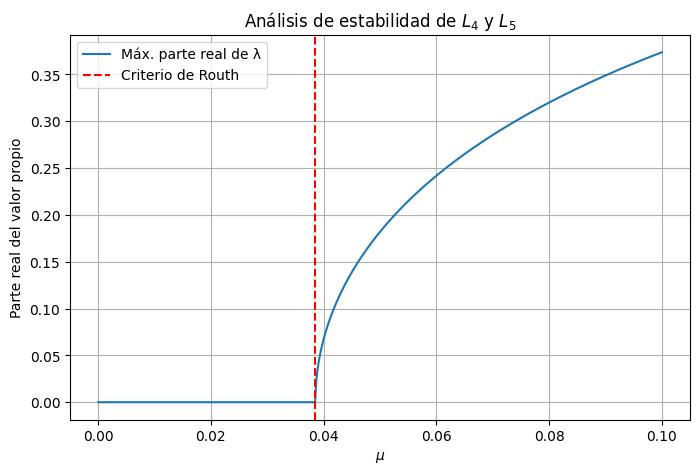

Valores propios para el sistema Sol-Tierra: [ 9.71445147e-16+0.99998987j  9.71445147e-16-0.99998987j
 -1.22336259e-15+0.00450003j -1.22336259e-15-0.00450003j]
Valores propios para el sistema Sol-Júpiter: [ 8.88178420e-16+0.99675757j  8.88178420e-16-0.99675757j
 -9.84719847e-16+0.08046336j -9.84719847e-16-0.08046336j]


In [51]:
# Función del potencial efectivo
def potencial_efectivo(x, y, mu):
  # Distancia a las dos masas primarias (cuerpos masivos del problema restringido de 3 cuerpos)
  r1 = np.sqrt((x + mu)**2 + y**2)
  r2 = np.sqrt((x - (1 - mu))**2 + y**2)

  # Potencial efectivo en el marco rotante
  # Incluye la atracción gravitatoria de las dos masas y el término centrífugo (-0.5 * r^2)
  return - (1 - mu) / r1 - mu / r2 - 0.5 * (x**2 + y**2)

# Hessiano del potencial
def hessian_potential(x, y, mu):
  # Distancias a los cuerpos primarios
  r1 = np.sqrt((x + mu)**2 + y**2)
  r2 = np.sqrt((x - (1 - mu))**2 + y**2)

  # Segunda derivada respecto a x
  U_xx = (1 - mu) * (3 * (x + mu)**2 / r1**5 - 1 / r1**3) + \
           mu * (3 * (x - (1 - mu))**2 / r2**5 - 1 / r2**3) + 1

  # Segunda derivada respecto a y
  U_yy = (1 - mu) * (3 * y**2 / r1**5 - 1 / r1**3) + \
           mu * (3 * y**2 / r2**5 - 1 / r2**3) + 1

  # Derivada mixta respecto a x y y
  U_xy = (1 - mu) * (3 * (x + mu) * y / r1**5) + \
           mu * (3 * (x - (1 - mu)) * y / r2**5)

  return U_xx, U_yy, U_xy

# Matriz A del sistema linealizado
def matriz_A(mu):
  # Coordenadas de L4 (triángulo equilátero con los dos cuerpos primarios)
  x_L4 = 0.5 - mu
  y_L4 = np.sqrt(3) / 2

  # Calcula el hessiano del potencial en L4
  U_xx, U_yy, U_xy = hessian_potential(x_L4, y_L4, mu)

  # Matriz del sistema linealizado alrededor de L4/L5
  A = np.array([[0, 1, 0, 0],
                  [U_xx, 0, U_xy, 2],
                  [0, 0, 0, 1],
                  [U_xy, -2, U_yy, 0]])
  return A

# Análisis de estabilidad en función de mu
def analizar_estabilidad(mu_values):
  reales = []  # Guardará los valores de mu donde el sistema es inestable

  for mu in mu_values:
    A = matriz_A(mu)
    eigenvalues = np.linalg.eigvals(A)  # Calcula los valores propios
    # Si alguna parte real de los eigenvalores es positiva → inestable
    if np.any(np.real(eigenvalues) > 0):
      reales.append(mu)

  return reales

# Barrido de mu y gráfico
mu_values = np.linspace(0, 0.1, 500)  # Valores de mu a analizar
mu_criticos = analizar_estabilidad(mu_values)  # Encuentra mu inestables

# Gráfica: máximo de la parte real de los valores propios
plt.figure(figsize=(8, 5))
plt.plot(mu_values,
         [np.max(np.real(np.linalg.eigvals(matriz_A(mu)))) for mu in mu_values],
         label='Máx. parte real de λ')
plt.axvline(x=0.03852, color='r', linestyle='--', label='Criterio de Routh')
plt.xlabel('$\mu$')
plt.ylabel('Parte real del valor propio')
plt.title('Análisis de estabilidad de $L_4$ y $L_5$')
plt.legend()
plt.grid()
plt.show()

# Casos particulares: Sol-Tierra y Sol-Júpiter
mu_tierra = 5.97e24 / (5.97e24 + 1.99e30)  # Relación de masas Sol-Tierra
mu_jupiter = 1.90e27 / (1.90e27 + 1.99e30)  # Relación de masas Sol-Júpiter

A_tierra = matriz_A(mu_tierra)    # Matriz linealizada para Sol-Tierra
A_jupiter = matriz_A(mu_jupiter)  # Matriz linealizada para Sol-Júpiter

eigen_tierra = np.linalg.eigvals(A_tierra)      # Eigenvalores del sistema Sol-Tierra
eigen_jupiter = np.linalg.eigvals(A_jupiter)    # Eigenvalores del sistema Sol-Júpiter

# Imprime los valores propios para ver estabilidad en ambos casos
print("Valores propios para el sistema Sol-Tierra:", eigen_tierra)
print("Valores propios para el sistema Sol-Júpiter:", eigen_jupiter)

# 8.

En la dinámica galáctica, el disco de una galaxia espiral puede presentar pequeñas perturbaciones que dan lugar a oscilaciones y ondas de densidad. Estas oscilaciones están gobernadas por la **ecuación de Jeans** en un disco delgado, que describe la evolución de perturbaciones en la densidad superficial $\Sigma(r,t)$ y la velocidad en presencia de la auto-gravitación del disco.  

Bajo la aproximación de pequeñas perturbaciones alrededor de un estado de equilibrio, las ecuaciones hidrodinámicas del sistema conducen a la ecuación diferencial:  

$$
\frac{d^2 \Sigma}{dt^2} + \kappa^2 \Sigma = 0,
$$

donde $\kappa$ es la **frecuencia de epicíclo**, que depende de la rotación del disco y describe la oscilación de una partícula en el plano del disco bajo pequeñas desviaciones de su órbita circular.  Muchas galaxias espirales presentan una curva de rotación aproximadamente **plana** a grandes radios, es decir, la velocidad de rotación $V(r)$ es aproximadamente constante:

$$
V(r) \approx V_0.
$$

En este caso, la frecuencia de epicíclo se puede aproximar como:

$$
\kappa \approx \sqrt{2} \Omega,
$$

donde:

$$
\Omega = \frac{V_0}{r}.
$$

- Graficar la evolución temporal de $\Sigma(t)$.  
- Calcular los valores propios de la matriz del sistema y discutir su relación con la estabilidad del disco.  
- Comparar los resultados numéricos con la solución analítica de la ecuación diferencial.  
$$
\Sigma(t)=\Sigma(0)\cos{\kappa t}+\frac{\dot{\Sigma(0)}}{\kappa}\sin{\kappa t}
$$
- Analizar cómo cambia la estabilidad del sistema al modificar $\kappa$.  


In [ ]:
# Definimos la ecuación diferencial de Jeans
def jeans(t, y, k):
  '''
  Sistema EDO para la ecuación de Jeans en un disco galáctico.

  Parámetros:
    t : float
        Tiempo (variable independiente)
    y : list o array
        [Sigma, dSigma/dt] = [amplitud de la perturbación, velocidad de la perturbación]
    k : float
        Frecuencia de epicíclo (κ)

  Retorna:
      list
        [dSigma/dt, d2Sigma/dt2]
  '''
  dSigma_dt = y[1]               # Primera derivada (velocidad de la perturbación)
  d2Sigma_dt2 = -k**2 * y[0]     # Ecuación diferencial de segundo orden
  return [dSigma_dt, d2Sigma_dt2]

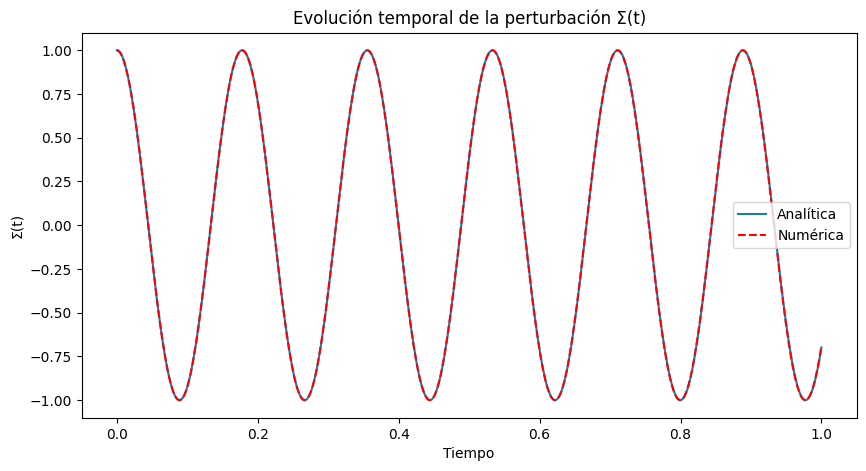

In [52]:
# Parámetros
V0 = 200       # km/s, velocidad de rotación típica de una galaxia
r = 8.0        # kpc, radio donde se analiza la perturbación
Omega = V0 / r # Frecuencia angular (Ω = V/r)
k = np.sqrt(2) * Omega  # Frecuencia de epicíclo (κ ≈ √2 Ω)

# Condiciones iniciales
Sigma0 = 1.0       # Amplitud inicial de la perturbación
Sigma_dot0 = 0.0   # Velocidad inicial (derivada de Σ)
y0 = [Sigma0, Sigma_dot0]

# Intervalo de tiempo
t_span = (0, 1)
t_eval = np.linspace(*t_span, 500)

# Resolver la ecuación diferencial numéricamente
sol = solve_ivp(jeans, t_span, y0, t_eval=t_eval, args=(k,), method='RK45')

# Solución analítica
t_analytic = np.linspace(*t_span, 500)
Sigma_analytic = Sigma0 * np.cos(k * t_analytic) + (Sigma_dot0 / k) * np.sin(k * t_analytic)

# Graficar la evolución temporal de sigma(t)
plt.figure(figsize=(10, 5))
plt.plot(t_analytic, Sigma_analytic, label="Analítica", linestyle='solid')
plt.plot(sol.t, sol.y[0], label="Numérica", linestyle='dashed', color='red')
plt.xlabel("Tiempo")
plt.ylabel("Σ(t)")
plt.title("Evolución temporal de la perturbación Σ(t)")
plt.legend()
plt.show()

In [ ]:
# Matriz del sistema para análisis de estabilidad
A = np.array([[0, 1], [-k**2, 0]])

# Cálculo de los valores propios
valores_propios = np.linalg.eigvals(A)
print("Valores propios de la matriz A:", valores_propios)

# Análisis de estabilidad
if np.all(np.real(valores_propios) == 0):
    print("El sistema es marginalmente estable: oscilaciones puras (sin crecimiento exponencial).")
elif np.any(np.real(valores_propios) > 0):
    print("El sistema es inestable: las perturbaciones crecen exponencialmente.")
else:
    print("El sistema es estable: las perturbaciones decaen con el tiempo.")

Valores propios de la matriz A: [0.+35.35533906j 0.-35.35533906j]
El sistema es marginalmente estable: oscilaciones puras (sin crecimiento exponencial).


# 9.
El método *Leapfrog* (o salto de rana) es un algoritmo numérico de segundo orden utilizado para integrar ecuaciones diferenciales ordinarias, especialmente en problemas de mecánica clásica donde se conserva la energía. Este método es particularmente útil para sistemas Hamiltonianos.

Considere la siguiente ecuación diferencial de segundo orden:
$$
\frac{d^2 x}{dt^2} = f(x),
$$
la cual puede descomponerse en un sistema acoplado de ecuaciones de primer orden:
$$
\frac{dx}{dt} = v, \quad \frac{dv}{dt} = f(x).
$$

El método Leapfrog actualiza las variables en pasos intercalados de tiempo ($\Delta t$) mediante las siguientes fórmulas:
$$
v_{n+1/2} = v_{n-1/2} + f(x_n) \Delta t,
$$
$$
x_{n+1} = x_n + v_{n+1/2} \Delta t.
$$

Escriba un programa en Python que utilice el método Leapfrog para resolver el problema del oscilador armónico, donde $f(x) = -\omega^2 x$ con $\omega = 2$ rad/s. Use condiciones iniciales $x(0) = 1$ y $v(0) = 0$, y un paso de tiempo $\Delta t = 0.01$ s en el intervalo $t \in [0, 10]$ s.

**Nota:** La siguiente relación puede ser útil
$$
v_{n+1/2}=v_{n}+\frac{1}{2}f(x_{n})\Delta t
$$

In [ ]:
def leapfrog(f, ti, Y0, h):
  '''
  Método Leapfrog para resolver sistemas EDO de la forma:
    dx/dt = v
    dv/dt = f(x)

  Entradas:
  - f : función que define dv/dt -> callable
  - ti : intervalo de tiempo (t0 , t_max) -> array
  - Y0 : parámetros iniciales (x0 , v0) -> array
  - h : tamaño de paso

  Retorna:
  - t, x, v -> arrays con el tiempo, posición y velocidad
  '''
  # Vector de tiempo
  t = np.arange(ti[0], ti[1] + h, h)
  N = len(t)

  # Inicializar arrays
  x = np.zeros(N)
  v = np.zeros(N)

  # Condiciones iniciales
  x0, v0 = Y0
  x[0] = x0
  v_half = v0 + 0.5 * f(x0) * h  # velocidad a medio paso

  # Iteración Leapfrog
  for n in range(N-1):
    x[n+1] = x[n] + v_half * h
    v_half = v_half + f(x[n+1]) * h
    v[n+1] = v_half - 0.5 * f(x[n+1]) * h  # reconstrucción de v

  return t, x, v

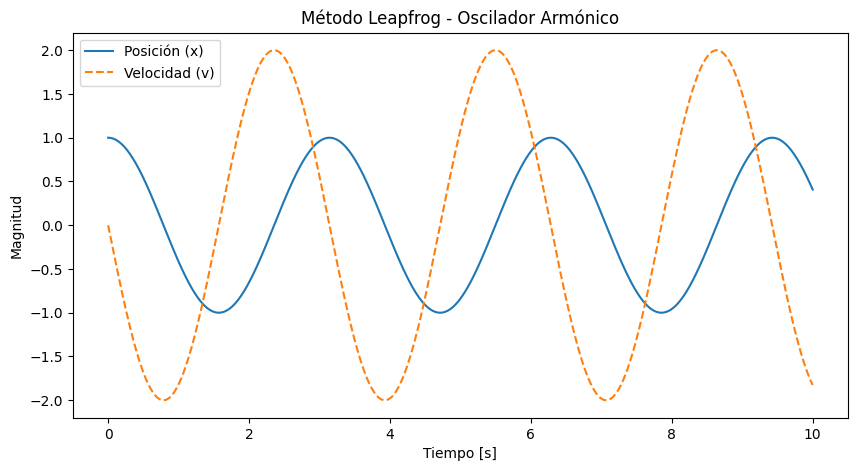

In [ ]:
# Parámetros
w = 2  # rad/s
f = lambda x: -w**2 * x  # Oscilador armónico
Y0 = np.array([1, 0])    # (x0, v0)
ti = [0, 10]             # intervalo de tiempo
h = 0.01                 # paso

# Resolver
t, x, v = leapfrog(f, ti, Y0, h)

# Graficar resultados
plt.figure(figsize=(10,5))
plt.plot(t, x, label="Posición (x)")
plt.plot(t, v, label="Velocidad (v)", linestyle='--')
plt.title("Método Leapfrog - Oscilador Armónico")
plt.xlabel("Tiempo [s]")
plt.ylabel("Magnitud")
plt.legend()
plt.show()